In [1]:
%run 'lib.ipynb'
%run 'data-generator.ipynb'

In [2]:
dg = DataGenerator('/d2/caches/tf-speech/train/audio')
dg.debug = True
dg.n_mels = 64
dg.msg_w = 64

file /d2/caches/tf-speech/train/audio/on/264f471d_nohash_3.wav
mixing with /d2/caches/tf-speech/train/audio/_background_noise_/running_tap.wav at 0.49 vol
on


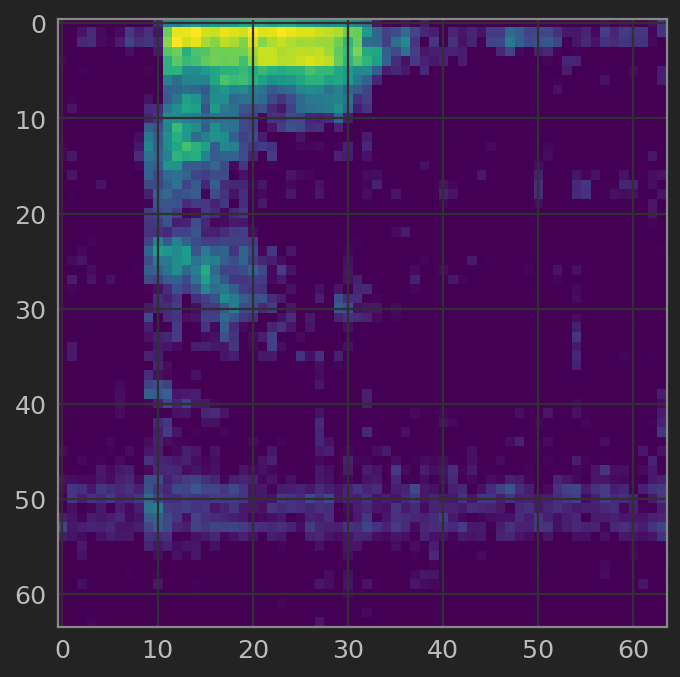

In [3]:
# try generating gen audio
a, a_label = dg.generate_audio()
print(a_label)
plt.imshow(dg.msg(a))
ipd.Audio(a, rate=16000)

In [4]:
# try mixing with noise
sr, s = wavfile.read(
    '/d2/caches/tf-speech/train/audio/go/4c4d2526_nohash_1.wav')
n = dg._load_random_segment(
    '/d2/caches/tf-speech/train/audio/_background_noise_/pink_noise.wav'
)[:len(s)]
s = dg.mix(s, 1., n, 0.05)
ipd.Audio(s, rate=sr)

In [7]:
# benchmark
from tqdm import tqdm
from collections import Counter
dg.debug = False
labels = Counter()

for i in tqdm(range(1000)):
    w, label = dg.generate_audio()
    labels[label] += 1

labels

100%|██████████| 1000/1000 [00:11<00:00, 86.43it/s]


Counter({'down': 84,
         'go': 92,
         'left': 77,
         'no': 75,
         'off': 88,
         'on': 81,
         'right': 90,
         'silence': 82,
         'stop': 81,
         'unknown': 89,
         'up': 80,
         'yes': 81})